# Demographics of Poland
## forecast until 2050
data source: [demografia.stat.gov.pl](https://demografia.stat.gov.pl/BazaDemografia/Downloader.aspx?file=2014_2050_Polska.zip&sys=prognozy)

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Read dataset

In [344]:
df = pd.read_excel('data/Polska.xlsx', sheet_name=5)

df.head()

,Ruch naturalny i migracyjny ludności w latach 2014-2050,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Polska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rok,NaN,Ludność na 31 XII,Ruch naturalny,NaN,Migracje wewnętrzne na pobyt stały,NaN,Migracje zagraniczne na pobyt stały,NaN
2,NaN,NaN,NaN,Urodzenia,Zgony,Napływ,Odpływ,Imigracja,Emigracja
3,Ogółem,2014.0,38461752,360447,384118,410975,410979,14102,24389
4,NaN,2015.0,38419006,353910,386808,398670,398671,14592,24389


## Data cleaning

In [345]:
cols = [5,6,7,8] # columns to drop
df.drop(df.columns[cols], axis=1, inplace=True)

rows = [0,1,2] # rows to drop
df.drop(rows, axis=0 ,inplace=True)

df.columns = ['Area', 'Year', 'Population [mln]', 'Births', 'Deaths']
df.head()

,Area,Year,Population [mln],Births,Deaths
3,Ogółem,2014.0,38461752,360447,384118
4,NaN,2015.0,38419006,353910,386808
5,NaN,2016.0,38369390,348807,389109
6,NaN,2017.0,38315463,345929,391029
7,NaN,2018.0,38259532,344983,392584


In [346]:
df = df.astype({
    'Year': 'int32', 
    'Population [mln]': 'float64', 
    'Births': 'int32', 
    'Deaths': 'int32' 
})

df['Population [mln]'] /= 1000000

In [347]:
# complementing the area to create a multiindex
for row in df.itertuples():
    if row.Area is not np.NaN:
        region = row.Area
    else:
        df.loc[row.Index, 'Area'] = region

df.set_index(['Area', 'Year'], inplace=True)
df.rename(index={'Ogółem': 'Total', 'Wieś': 'Rural', 'Miasta': 'Urban'}, inplace=True)

df.head()

Population [mln]  Births  Deaths
Area  Year                                  
Total 2014         38.461752  360447  384118
      2015         38.419006  353910  386808
      2016         38.369390  348807  389109
      2017         38.315463  345929  391029
      2018         38.259532  344983  392584

In [348]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 111 entries, ('Total', 2014) to ('Rural', 2050)
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Population [mln]  111 non-null    float64
 1   Births            111 non-null    int32  
 2   Deaths            111 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 3.7 KB


## Data review

In [349]:
df

Population [mln]  Births  Deaths
Area  Year                                  
Total 2014         38.461752  360447  384118
      2015         38.419006  353910  386808
      2016         38.369390  348807  389109
      2017         38.315463  345929  391029
      2018         38.259532  344983  392584
...                      ...     ...     ...
Rural 2046         15.263574  120840  173830
      2047         15.230551  119794  174032
      2048         15.196437  118669  174070
      2049         15.161179  117492  173973
      2050         15.124953  116323  173769

[111 rows x 3 columns]

In [350]:
df.loc['Total'].describe()

,Population [mln],Births,Deaths
count,37.000000,37.000000,37.000000
mean,36.647352,295608.486486,415389.108108
std,1.419357,32138.762774,20214.933373
min,33.950569,254744.000000,384118.000000
25%,35.500249,273304.000000,396489.000000
50%,36.917987,278724.000000,413936.000000
75%,37.918575,323506.000000,435551.000000
max,38.461752,360447.000000,442338.000000


In [351]:
df.loc['Rural'].describe()

,Population [mln],Births,Deaths
count,37.000000,37.000000,37.000000
mean,15.418986,133180.270270,159399.729730
std,0.127438,11841.294671,10005.865415
min,15.124953,116323.000000,148899.000000
25%,15.325799,124104.000000,150140.000000
50%,15.445895,128817.000000,155404.000000
75%,15.531535,144645.000000,170192.000000
max,15.566847,154064.000000,174070.000000


In [352]:
df.loc['Urban'].describe()

,Population [mln],Births,Deaths
count,37.000000,37.000000,37.000000
mean,21.228366,162428.216216,255989.297297
std,1.361865,20456.076284,11194.348172
min,18.825616,138422.000000,235220.000000
25%,20.091206,148056.000000,246694.000000
50%,21.355845,149907.000000,256255.000000
75%,22.428712,178860.000000,266766.000000
max,23.202410,206384.000000,271195.000000


## Poland population 2014 - 2050
- Total
- Rural area
- Urban area

<AxesSubplot:title={'center':'Poland Population 2014-2050 (Total)'}, xlabel='Year', ylabel='Population [mln]'>

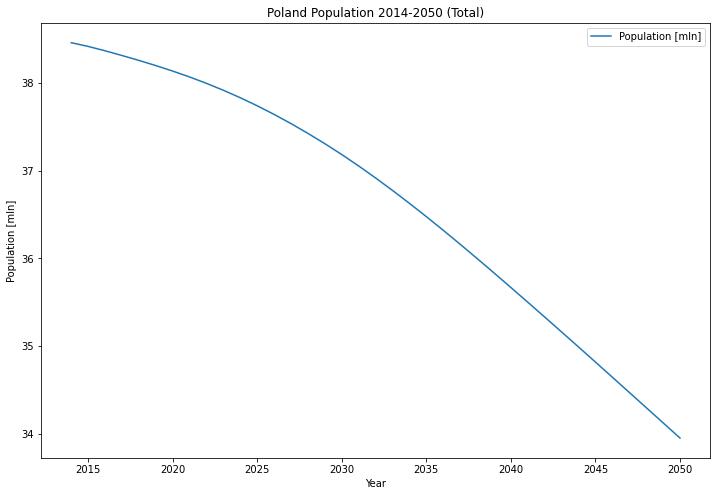

In [353]:
df.loc["Total"].plot(
    y="Population [mln]",
    figsize=(12, 8),
    title="Poland Population 2014-2050 (Total)",
    ylabel="Population [mln]",
)


<AxesSubplot:title={'center':'Poland Population 2014-2050 (Urban area)'}, xlabel='Year', ylabel='Population [mln]'>

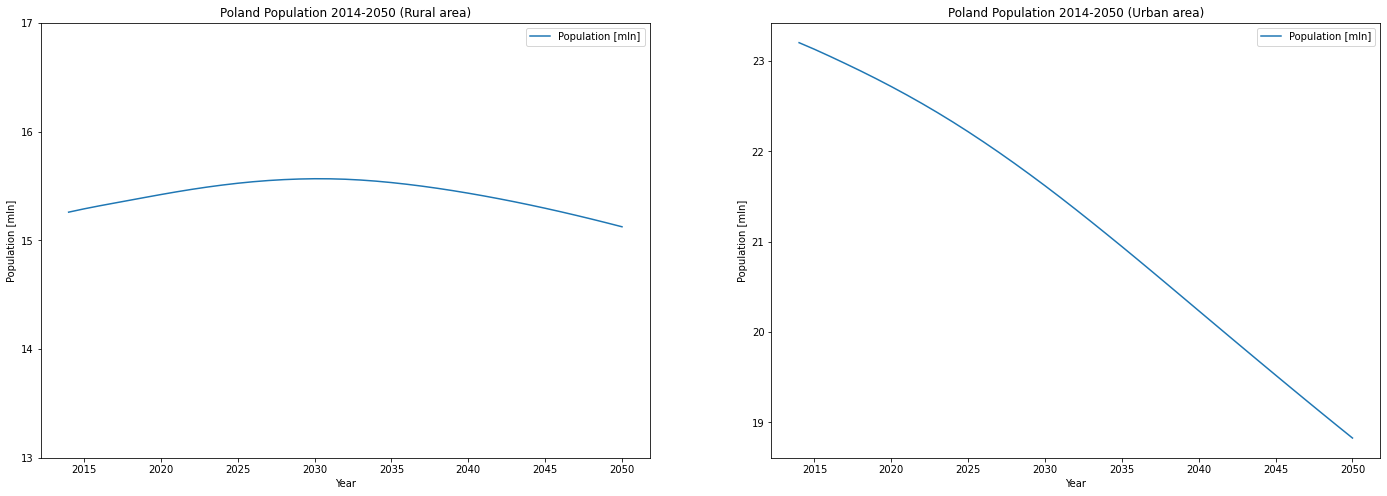

In [354]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

df.loc["Rural"].plot(
    y="Population [mln]",
    title="Poland Population 2014-2050 (Rural area)",
    yticks=([13, 14, 15, 16, 17]),
    ylabel="Population [mln]",
    ax=axes[0],
)

df.loc["Urban"].plot(
    y="Population [mln]",
    title="Poland Population 2014-2050 (Urban area)",
    ylabel="Population [mln]",
    ax=axes[1],
)


## Births and deaths 2014 - 2050
- Total
- Urban area
- Rural area

<AxesSubplot:title={'center':'Births And Deaths 2014-2050 (Total)'}, xlabel='Year', ylabel='Population'>

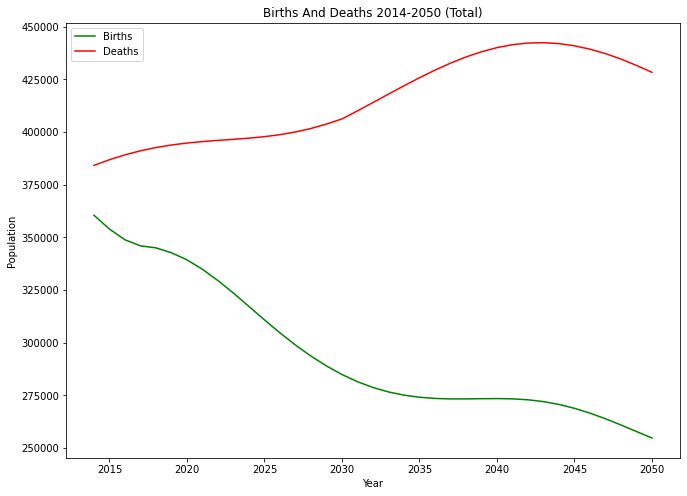

In [355]:
df.loc["Total"].plot(
    y=["Births", "Deaths"],
    figsize=(11, 8),
    title="Births And Deaths 2014-2050 (Total)",
    ylabel="Population",
    color=["green", "red"],
)


<AxesSubplot:title={'center':'Births And Deaths 2014-2050 (Urban area)'}, xlabel='Year'>

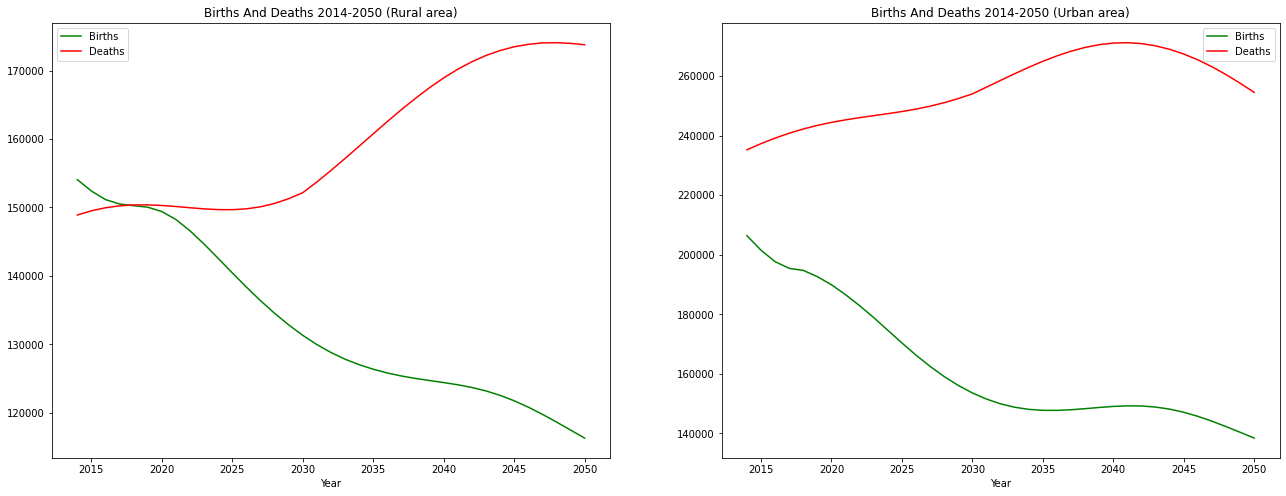

In [356]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))

df.loc["Rural"].plot(
    y=["Births", "Deaths"],
    title="Births And Deaths 2014-2050 (Rural area)",
    color=["green", "red"],
    ax=axes[0],
)

df.loc["Urban"].plot(
    y=["Births", "Deaths"],
    title="Births And Deaths 2014-2050 (Urban area)",
    color=["green", "red"],
    ax=axes[1],
)


<AxesSubplot:title={'center':'Births and deaths in rural areas (2014, 2022, 2050)'}, xlabel='Area,Year', ylabel='Population'>

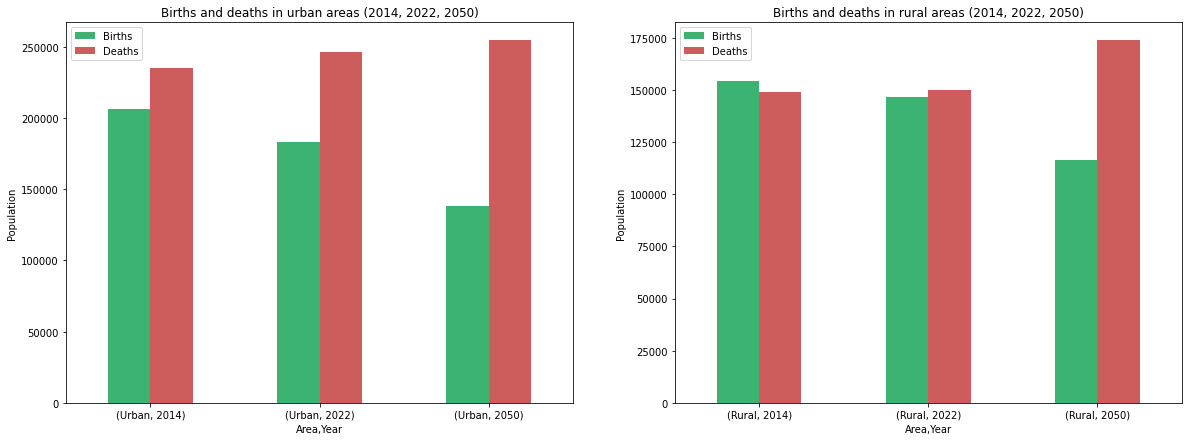

In [357]:
fig, axes = plt.subplots(nrows=1, ncols=2)

urban_list = [("Urban", 2014), ("Urban", 2022), ("Urban", 2050)]
df[df.index.isin(urban_list)].plot(
    kind="bar",
    y=["Births", "Deaths"],
    color=["mediumseagreen", "indianred"],
    figsize=(10, 8),
    ylabel="Population",
    title="Births and deaths in urban areas (2014, 2022, 2050)",
    rot=0,
    ax=axes[0],
)

rural_list = [("Rural", 2014), ("Rural", 2022), ("Rural", 2050)]
df[df.index.isin(rural_list)].plot(
    kind="bar",
    y=["Births", "Deaths"],
    color=["mediumseagreen", "indianred"],
    figsize=(20, 7),
    ylabel="Population",
    title="Births and deaths in rural areas (2014, 2022, 2050)",
    rot=0,
    ax=axes[1],
)


## Percentage of the population, births and deaths by area for 2022

array([<AxesSubplot:ylabel='Population [mln]'>,
       <AxesSubplot:ylabel='Births'>, <AxesSubplot:ylabel='Deaths'>],
      dtype=object)

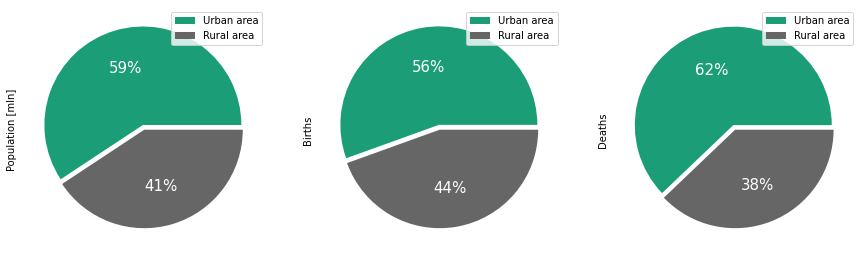

In [358]:
urban_rural_compare = [("Urban", 2022), ("Rural", 2022)]

df[df.index.isin(urban_rural_compare)].plot(
    kind="pie",
    subplots=True,
    figsize=(15, 15),
    colormap="Dark2",
    labels=["Urban area", "Rural area"],
    autopct="%.0f%%",
    fontsize=15,
    textprops=dict(color="w"),
    explode=(0.05, 0),
)


# Age groups

## Read dataset

In [359]:
df = pd.read_excel('data/Polska.xlsx', sheet_name=1)

df.head()

,"Ludność według płci i funkcjonalnych grup wieku, stan w dniu 31.XII",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Polska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,NaN,Ogółem,NaN,NaN,Miasta,NaN,NaN,Wieś,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Ogółem,Mężczyźni,Kobiety,Ogółem,Mężczyźni,Kobiety,Ogółem,Mężczyźni,Kobiety,NaN,NaN,NaN,NaN
3,2013,Ogółem,38495659,18629535,19866124,23271664,11039416,12232248,15223995,7590119,7633876,NaN,NaN,NaN,NaN
4,NaN,0-2,1145573,589016,556557,665154,342394,322760,480419,246622,233797,NaN,NaN,NaN,NaN


## Data cleaning

In [360]:
cols = [11, 12, 13, 14]  # columns to drop
df.drop(df.columns[cols], axis=1, inplace=True)

rows = [0, 1, 2]  # rows to drop
df.drop(rows, axis=0, inplace=True)


df.columns = [
    "Year",
    "Age group",
    "Population [mln]",
    "Man",
    "Woman",
    "Population [mln]",
    "Man",
    "Woman",
    "Population [mln]",
    "Man",
    "Woman",
]

for row in df.itertuples():
    if row.Year is not np.NaN:
        year = row.Year
    else:
        df.loc[row.Index, "Year"] = year


df.set_index(["Year", "Age group"], inplace=True)

df.rename(
    index={
        "Ogółem": "total",
        "przedprodukcyjny*": "pre-working age",
        "przedprodukcyjny": "pre-working age",
        "produkcyjny": "working age",
        "poprodukcyjny": "post-working age",
        "mobilny": "mobile age",
        "niemobilny": "immobile age",
    },
    inplace=True,
)

df.drop(["kobiety 15-49", "kobiety15-49"], level="Age group", inplace=True)

df.head(21)


Population [mln]       Man     Woman Population [mln]  \
Year Age group                                                                
2013 total                    38495659  18629535  19866124         23271664   
     0-2                       1145573    589016    556557           665154   
     3-6                       1684439    863602    820837           969126   
     7-12                      2183789   1120277   1063512          1197310   
     13-15                     1149106    589468    559638           608880   
     16-18                     1268824    649391    619433           682089   
     18                         436369    222811    213558           229282   
     19-24                     3074446   1567883   1506563          1698684   
     pre-working age           6995362   3588943   3406419          3893277   
     working age              24548065  12911353  11636712         14856216   
     mobile age               15337852   7781275   7556577          9172047   
     immobile age              9210213   5130078   4080135          5684169   
     post-working age          6952232   2129239   4822993          4522171   
     0-14                      5771426   2961289   2810137          3233970   
     15-59                    24431474  12272447  12159027         14653836   
     60+                       8292759   3395799   4896960          5383858   
     15-64                    27051625  13487055  13564570         16394408   
     65+                       5672608   2181191   3491417          3643286   
     75+                       2630496    877574   1752922          1633201   
     80+                       1483142    451152   1031990           905609   
     85+                        623764    165493    458271           376298   

                            Man     Woman Population [mln]      Man    Woman  
Year Age group                                                                
2013 total             11039416  12232248         15223995  7590119  7633876  
     0-2                 342394    322760           480419   246622   233797  
     3-6                 496706    472420           715313   366896   348417  
     7-12                614184    583126           986479   506093   480386  
     13-15               312583    296297           540226   276885   263341  
     16-18               346972    335117           586735   302419   284316  
     18                  116960    112322           207087   105851   101236  
     19-24               859736    838948          1375762   708147   667615  
     pre-working age    1995879   1897398          3102085  1593064  1509021  
     working age        7686403   7169813          9691849  5224950  4466899  
     mobile age         4600031   4572016          6165805  3181244  2984561  
     immobile age       3086372   2597797          3526044  2043706  1482338  
     post-working age   1357134   3165037          2430061   772105  1657956  
     0-14               1659726   1574244          2537456  1301563  1235893  
     15-59              7211579   7442257          9777638  5060868  4716770  
     60+                2168111   3215747          2908901  1227688  1681213  
     15-64              7988868   8405540         10657217  5498187  5159030  
     65+                1390822   2252464          2029322   790369  1238953  
     75+                 546140   1087061           997295   331434   665861  
     80+                 278667    626942           577533   172485   405048  
     85+                 100713    275585           247466    64780   182686

In [361]:
df = df.astype({
    'Population [mln]': 'float64',
    'Man': 'int32',
    'Woman': 'int32'
})

df['Population [mln]'] /= 1000000

In [362]:
total_df = df.iloc[:, [0,1,2]].copy()
urban_df = df.iloc[:, [3,4,5]].copy()
rural_df = df.iloc[:, [6,7,8]].copy()

## Population for each age group for 2022
- pre-working age: 0 - 17
- working age: 18 - retirement age
- post-working age: above retirement age
- mobile age: 18 - 44
- immobile age: 45 - retirement age

the retirement age for 2022
-  Man: 67
- Woman: 62.5

<AxesSubplot:title={'center':'Population by age groups for 2022'}, xlabel='Age group', ylabel='Population [mln]'>

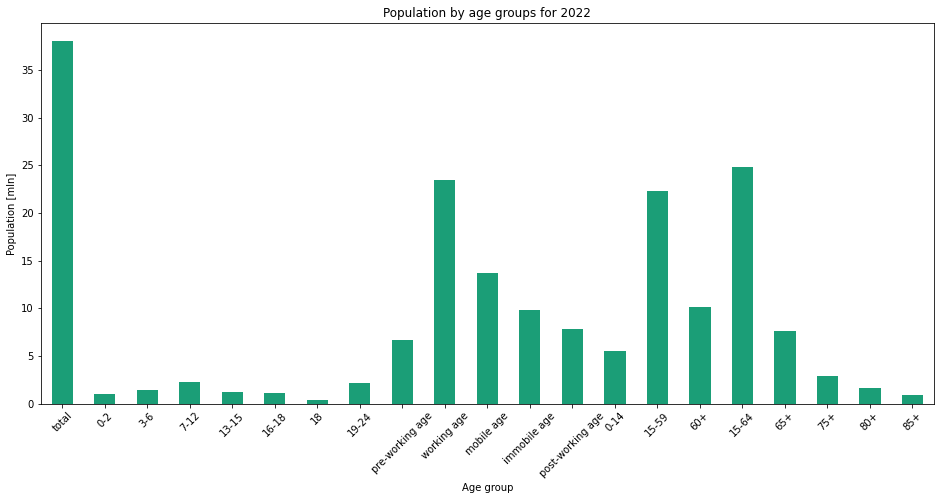

In [373]:
total_df.loc["2022"]["Population [mln]"].plot(
    kind="bar",
    rot=45,
    figsize=(16, 7),
    colormap="Dark2",
    ylabel="Population [mln]",
    title="Population by age groups for 2022",
)


## Compare changes over time
- working age
- post-working age

In [364]:
age_group_population_df = total_df.reset_index()
age_group_population_df = age_group_population_df.pivot(
    index="Year", columns="Age group", values="Population [mln]"
)

age_group_population_df.head(5)

Age group,0-14,0-2,13-15,15-59,15-64,16-18,18,19-24,3-6,60+,...,7-12,75+,80+,85+,immobile age,mobile age,post-working age,pre-working age,total,working age
Year,,,,,,,,,,,,,,,,,,,,,
2013,5.771426,1.145573,1.149106,24.431474,27.051625,1.268824,0.436369,3.074446,1.684439,8.292759,...,2.183789,2.630496,1.483142,0.623764,9.210213,15.337852,6.952232,6.995362,38.495659,24.548065
2014,5.751453,1.110418,1.124176,24.171830,26.845165,1.223198,0.424221,2.959302,1.677628,8.538469,...,2.219385,2.667117,1.521754,0.660680,9.220815,15.267896,7.042457,6.930584,38.461752,24.488711
2015,5.728499,1.076263,1.097908,23.892174,26.619852,1.178436,0.407453,2.837372,1.635789,8.798333,...,2.295372,2.697222,1.560081,0.701193,9.244889,15.164812,7.132990,6.876315,38.419006,24.409701
2016,5.711004,1.064873,1.071310,23.613838,26.366985,1.147163,0.390797,2.711764,1.564371,9.044548,...,2.377019,2.711967,1.596323,0.734267,9.276421,15.031531,7.227499,6.833939,38.369390,24.307952
2017,5.703504,1.050795,1.061047,23.323038,26.098460,1.122320,0.379512,2.600244,1.511988,9.288921,...,2.433595,2.708231,1.625520,0.762309,9.325619,14.868042,7.321569,6.800233,38.315463,24.193661


<AxesSubplot:title={'center':'Working and post-working age group over time'}, xlabel='Year', ylabel='Population [mln]'>

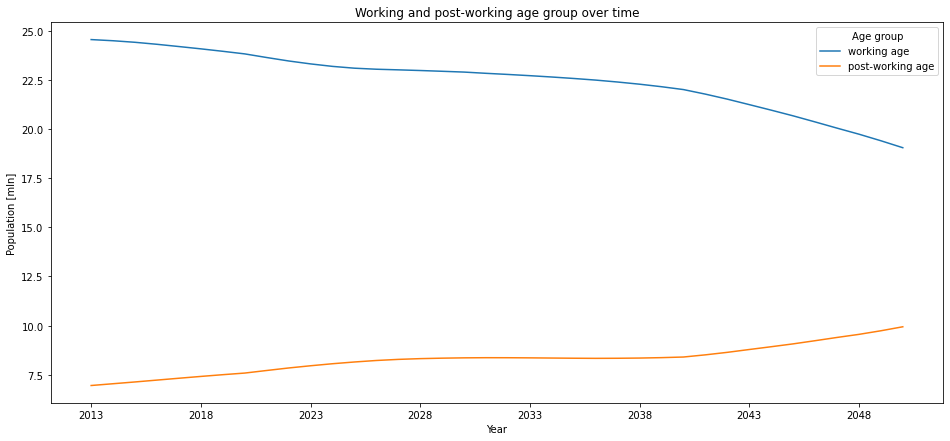

In [365]:
age_group_population_df.plot(
    y = ['working age', 'post-working age'],
    figsize=(16, 7),
    ylabel="Population [mln]",
    title="Working and post-working age group over time",
)

<AxesSubplot:title={'center':'Working and post-working age group over time'}, xlabel='Year', ylabel='Population [mln]'>

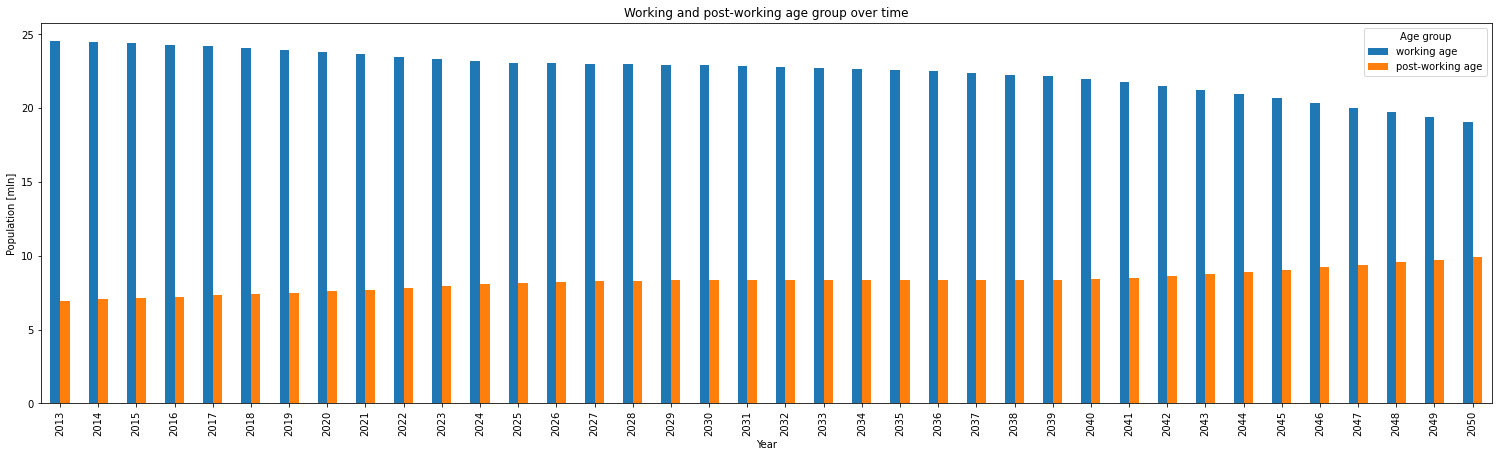

In [366]:
age_group_population_df.plot(
    kind = 'bar',
    y = ['working age', 'post-working age'],
    figsize=(26, 7),
    ylabel="Population [mln]",
    title="Working and post-working age group over time",
)

In [367]:
age_group_population2 = (
    age_group_population_df.loc[
        ["2013", "2022", "2050"], ["working age", "post-working age"]
    ]
    .unstack()
    .to_frame()
    .reset_index()
    .pivot_table(index="Age group", columns="Year", values=0)
)

age_group_population2.head()

Year,2013,2022,2050
Age group,,,
post-working age,6.952232,7.843359,9.939456
working age,24.548065,23.460313,19.047747


array([<AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2022'>,
       <AxesSubplot:ylabel='2050'>], dtype=object)

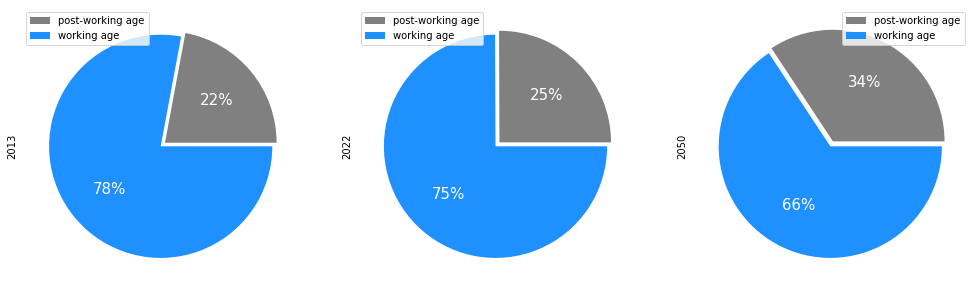

In [368]:
age_group_population2.plot(
    kind="pie",
    subplots=True,
    figsize=(17, 17),
    colors=['grey', 'dodgerblue'],
    autopct="%.0f%%",
    fontsize=15,
    textprops=dict(color="w"),
    labeldistance=None,
    explode=(0.05, 0)
)

# Life expectancy

## Read dataset

In [369]:
df = pd.read_excel("data/life_expectancy.xlsx", sheet_name=0)

df.head()

,Przeciętne trwanie życia noworodka w Polsce (miasta/wieś) w latach 1990-2020 a),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rok,Ogółem,NaN,Miasta,NaN,Wieś,NaN,NaN
2,NaN,mężczyźni,kobiety,mężczyźni,kobiety,mężczyźni,kobiety,NaN
3,1990,66.2,75.2,66.2,74.9,66.2,75.8,NaN
4,1991,65.9,75.1,65.8,74.7,66,75.7,NaN


## Data cleaning

In [370]:
cols = [3, 4, 5, 6, 7]  # columns to drop
df.drop(df.columns[cols], axis=1, inplace=True)

rows = [0, 1, 2, 33, 34, 35, 36]  # rows to drop
df.drop(rows, axis=0, inplace=True)

df.columns = ["Year", "Man", "Woman"]
df.set_index("Year", inplace=True)

In [371]:
df

,Man,Woman
Year,,
1990,66.2,75.2
1991,65.9,75.1
1992,66.5,75.5
1993,67.2,75.8
1994,67.5,76.1
1995,67.6,76.4
1996,68.1,76.6
1997,68.5,77
1998,68.9,77.3


## Life expectancy at birth

data from 1990 to 2019

<AxesSubplot:title={'center':'Life expectancy at birth (1990-2019)'}, xlabel='Year', ylabel='Life expectancy'>

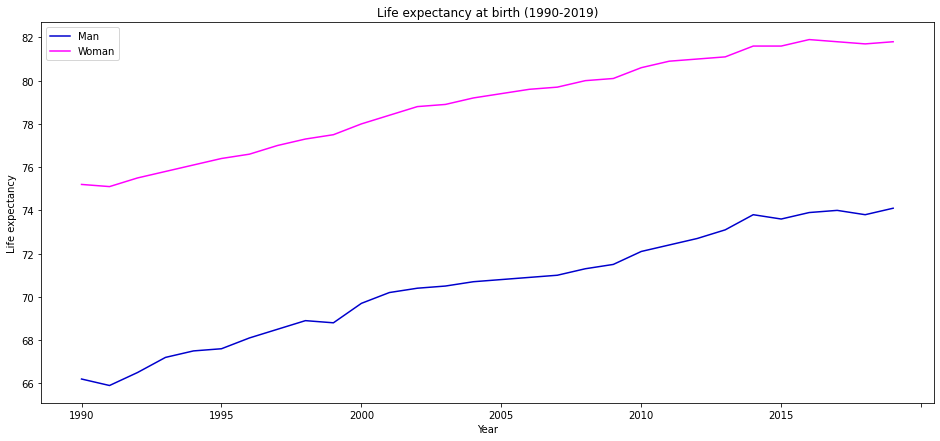

In [372]:
df.plot(
    figsize=(16, 7),
    ylabel="Life expectancy",
    title="Life expectancy at birth (1990-2019)",
    color=["mediumblue", "magenta"],
)